In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Bank Of America
BAC = pd.read_csv('BAC.csv',parse_dates=True,index_col='Date')

# JP Morgan
JPM = pd.read_csv('JPM.csv',parse_dates=True,index_col='Date')

# CitiGroup
C = pd.read_csv('C.csv',parse_dates=True,index_col='Date')
# HSBC
HSBC = pd.read_csv('HSBC.csv',parse_dates=True,index_col='Date')

# Royal Bank Of Canada
RY = pd.read_csv('RY.csv',parse_dates=True,index_col='Date')

In [3]:
portfolio_list = [BAC,JPM,C,HSBC,RY]

In [4]:
portfolio_dict = {'BAC':BAC, 'JPM':JPM, 'C':C, 'HSBC':HSBC, 'RY':RY}

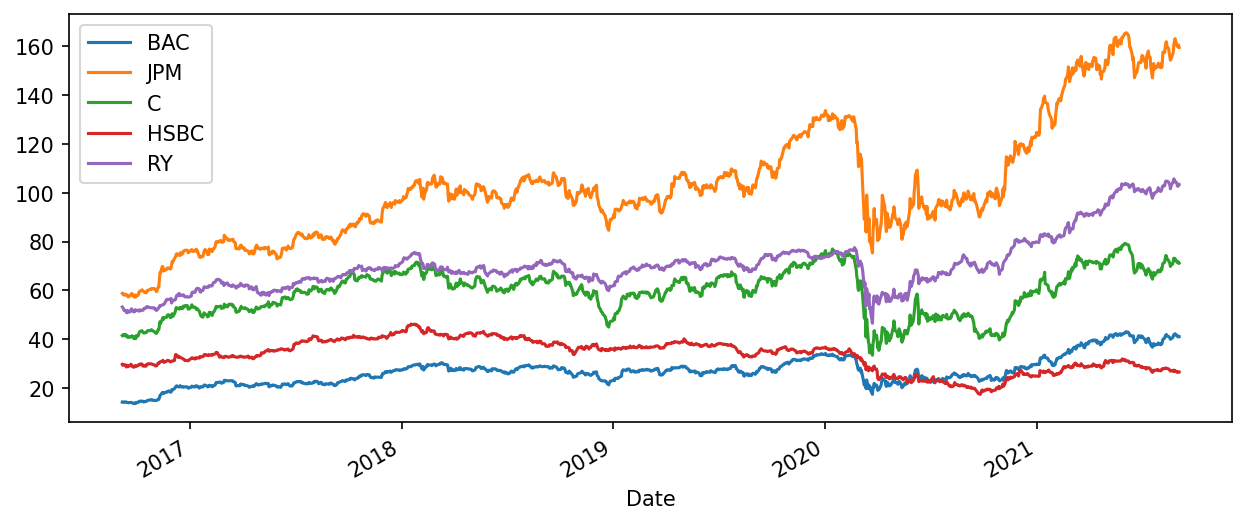

In [5]:
fig,ax = plt.subplots(dpi=150, figsize=(10,4))
BAC['Adj Close'].plot(ax=ax, label='BAC')
JPM['Adj Close'].plot(ax=ax, label='JPM')
C['Adj Close'].plot(ax=ax, label='C')
HSBC['Adj Close'].plot(ax=ax, label='HSBC')
RY['Adj Close'].plot(ax=ax, label='RY')

plt.legend()

In [6]:
def perc_calc(ticker,start_date,end_date):
    
    if start_date not in ticker['Adj Close'].index:
        return f'Start Date not in index'
    
    if end_date not in ticker['Adj Close'].index:
        return f'End Date not in index'
    
    adj_close_start = ticker['Adj Close'][start_date]
    adj_close_end = ticker['Adj Close'][end_date]
    change = 100 * (adj_close_end - adj_close_start)/ adj_close_start
    
    return f'Percent Change: {np.round(change,2)}'

In [7]:
perc_calc(BAC, '2016-09-06', '2021-09-03')

'Percent Change: 187.74'

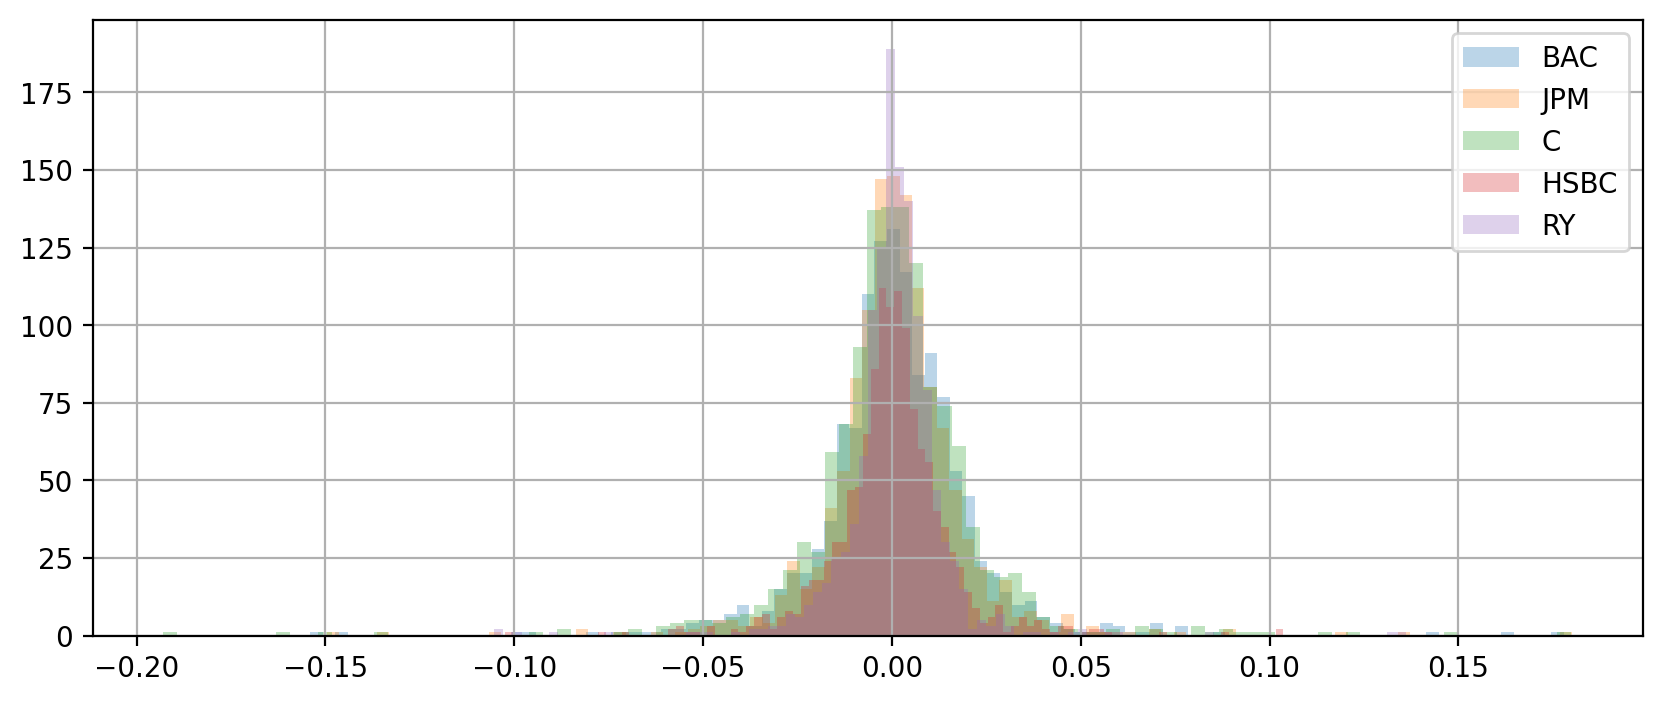

In [8]:
plt.figure(dpi=200,figsize=(10,4))

for stock_name, stock_df in portfolio_dict.items():
    stock_df['Adj Close'].pct_change(1).hist(label= stock_name , alpha=0.3, bins=100)
    
plt.legend()

In [9]:
bc_returns = BAC['Adj Close'].pct_change(1)[1:]

In [10]:
cummulative_returns = (bc_returns+1).cumprod()

In [11]:
bac_10000 = cummulative_returns*10000  

<Axes: xlabel='Date'>

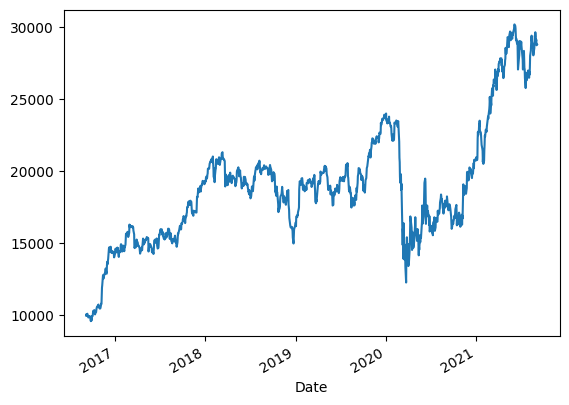

In [12]:
bac_10000.plot()

In [13]:
def compute_sharpe_ratio(data,risk_free_rate=0):
    mean_return = data['Adj Close'].pct_change(1).mean()
    std = data['Adj Close'].pct_change(1).std()
    
    sharpe_ratio = (mean_return - risk_free_rate)/std
    
    return (252**0.5)*sharpe_ratio

In [14]:
for ticker, df in portfolio_dict.items():
    print(f'{ticker} Annualized Sharpe Ratio is: {compute_sharpe_ratio(df)}')

BAC Annualized Sharpe Ratio is: 0.7947267104783101
JPM Annualized Sharpe Ratio is: 0.8165069200136574
C Annualized Sharpe Ratio is: 0.47918276513516356
HSBC Annualized Sharpe Ratio is: 0.03389350547471227
RY Annualized Sharpe Ratio is: 0.7323176596668234


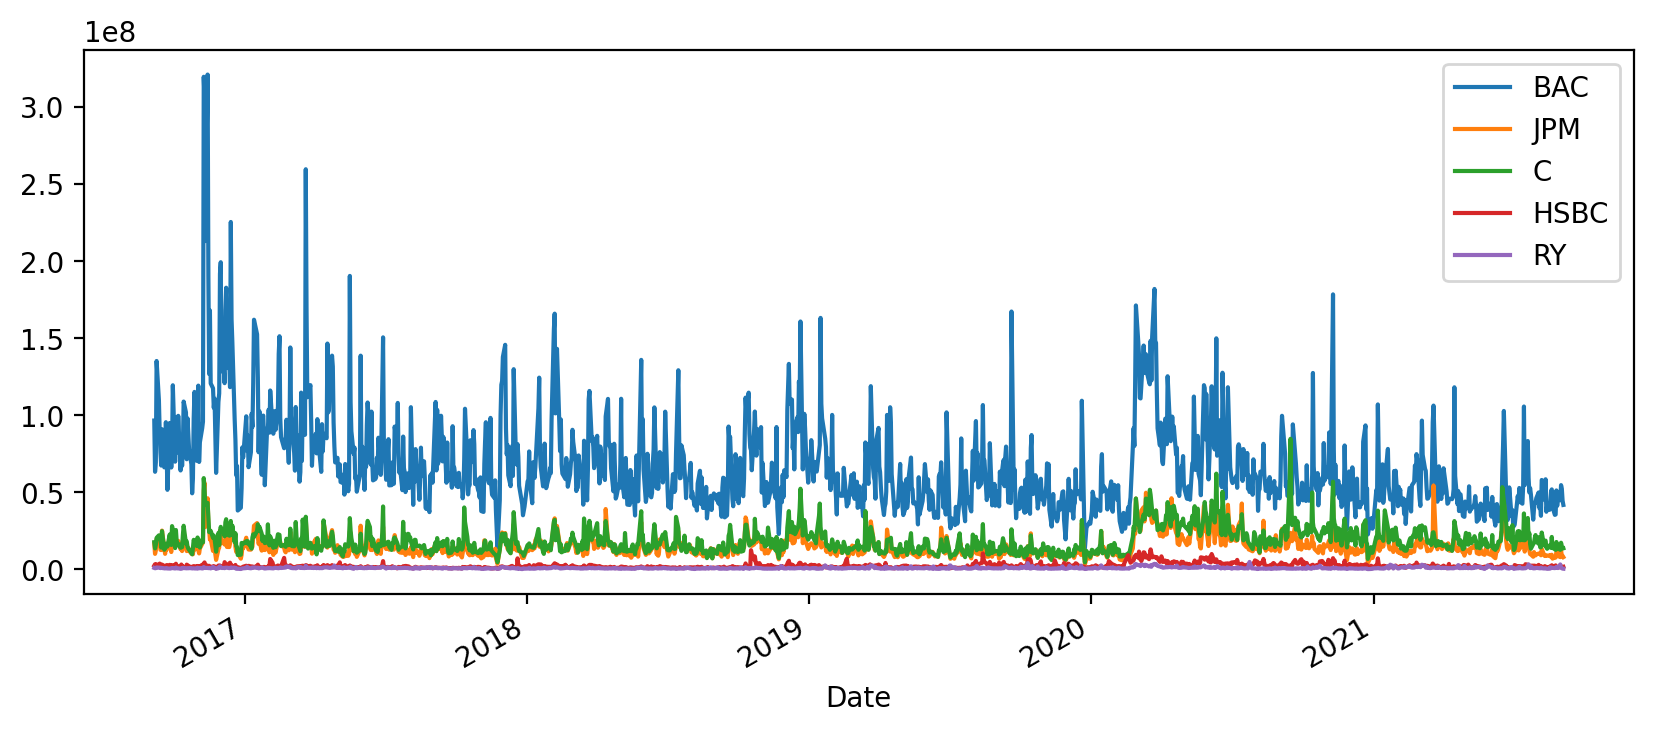

In [15]:
plt.figure(dpi=200,figsize=(10,4))

for stock_name, stock_df in portfolio_dict.items():
    
    stock_df['Volume'].plot(label= stock_name)
    
plt.legend()

In [16]:
C['Total Dollar Volume'] = C['Adj Close']*C['Volume']

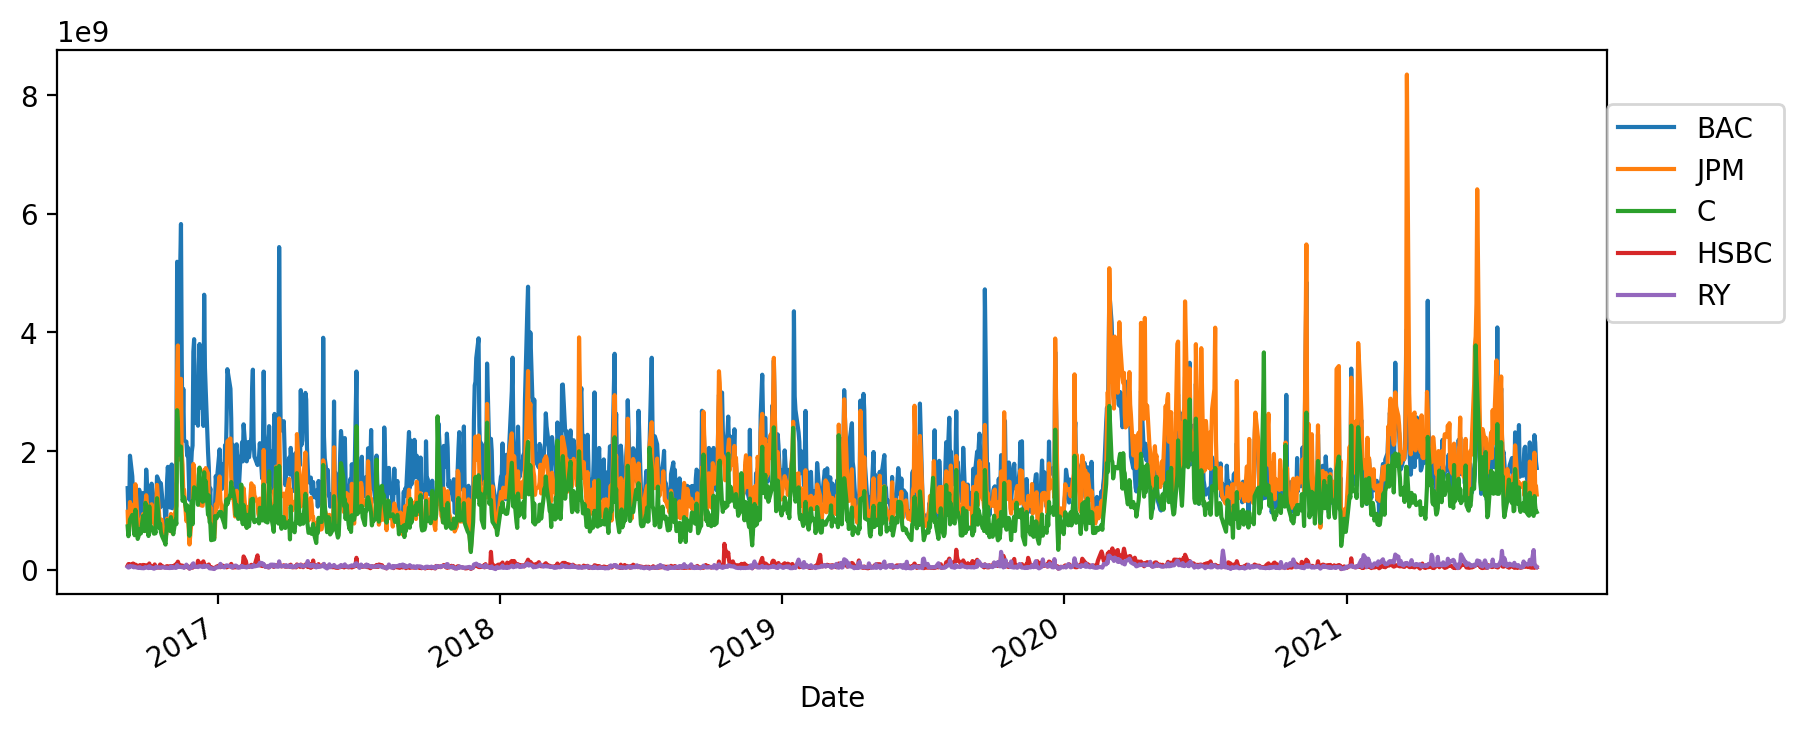

In [17]:
plt.figure(dpi=200,figsize=(10,4))

for stock_name, stock_df in portfolio_dict.items():
    
    (stock_df['Volume']*stock_df['Adj Close']).plot(label= stock_name)
    
plt.legend(loc=(1,0.5))

In [18]:
JPM['Total Dollar Volume'] = JPM['Volume']*JPM['Adj Close']

In [19]:
JPM['Total Dollar Volume'].max()

8345011203.784801

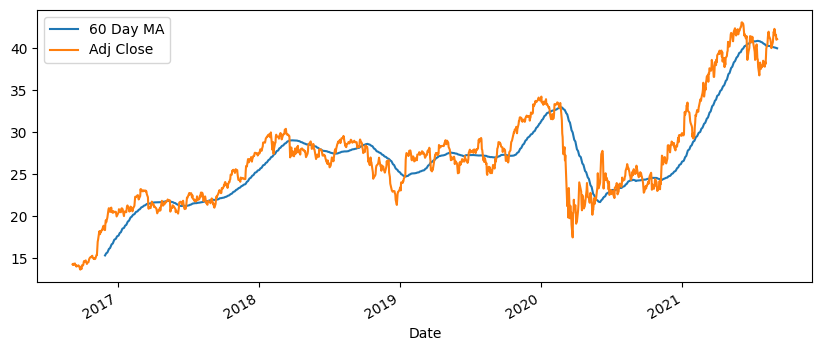

In [20]:
plt.figure(figsize=(10,4))
BAC['Adj Close'].rolling(window=60).mean().plot(label='60 Day MA')
BAC['Adj Close'].plot(label = 'Adj Close')

plt.legend()

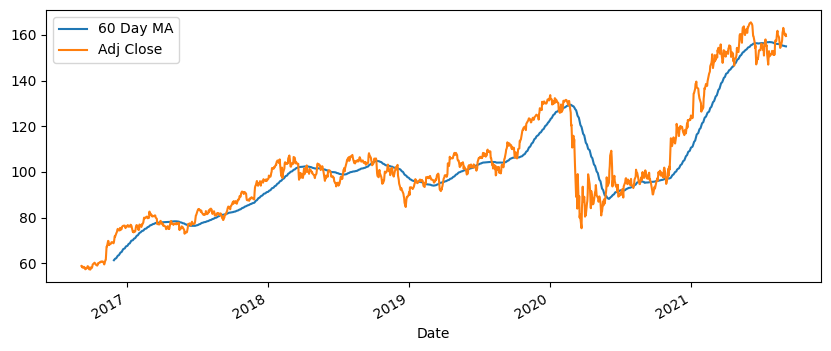

In [22]:
plt.figure(figsize=(10,4))
JPM['Adj Close'].rolling(window=60).mean().plot(label='60 Day MA')
JPM['Adj Close'].plot(label = 'Adj Close')

plt.legend()

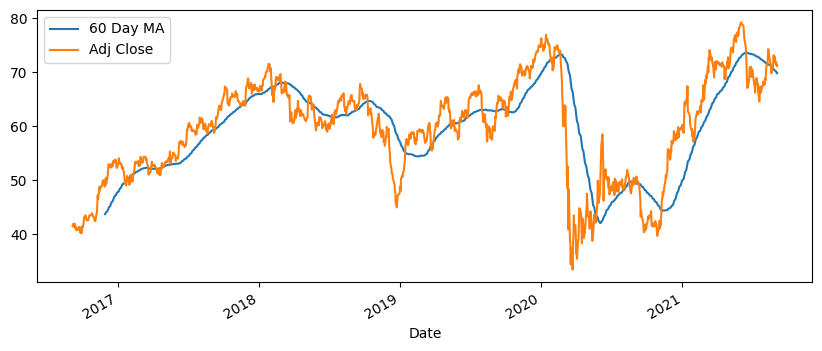

In [23]:
plt.figure(figsize=(10,4))
C['Adj Close'].rolling(window=60).mean().plot(label='60 Day MA')
C['Adj Close'].plot(label = 'Adj Close')

plt.legend()

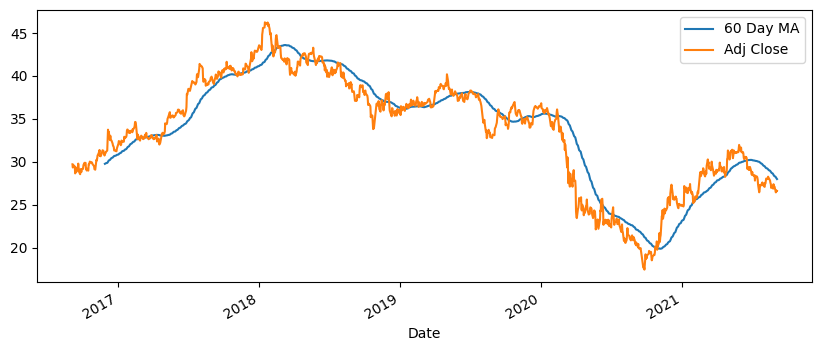

In [24]:
plt.figure(figsize=(10,4))
HSBC['Adj Close'].rolling(window=60).mean().plot(label='60 Day MA')
HSBC['Adj Close'].plot(label = 'Adj Close')

plt.legend()

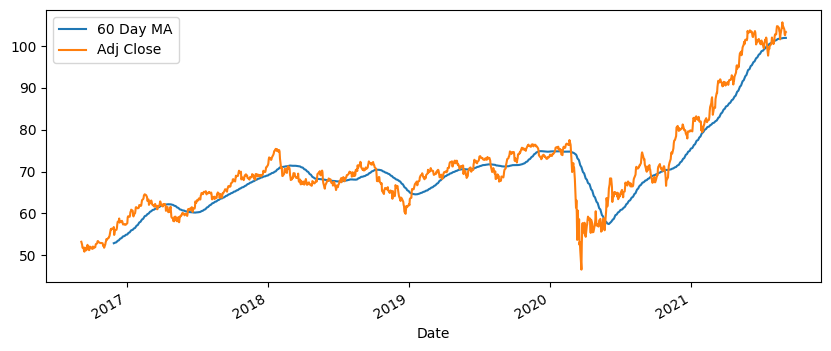

In [25]:
plt.figure(figsize=(10,4))
RY['Adj Close'].rolling(window=60).mean().plot(label='60 Day MA')
RY['Adj Close'].plot(label = 'Adj Close')

plt.legend()

<Axes: xlabel='Date'>

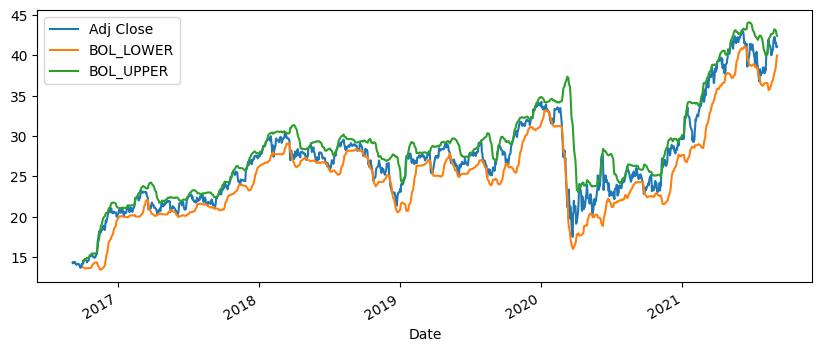

In [21]:
BAC['MA'] = BAC['Adj Close'].rolling(20).mean()
BAC['STD'] = BAC['Adj Close'].rolling(20).std()

BAC['BOL_LOWER'] = BAC['MA'] - 2*BAC['STD']
BAC['BOL_UPPER'] = BAC['MA'] + 2*BAC['STD']

fig,ax =plt.subplots(figsize=(10,4))
BAC[['Adj Close','BOL_LOWER','BOL_UPPER']].plot(ax=ax)

<Axes: xlabel='Date'>

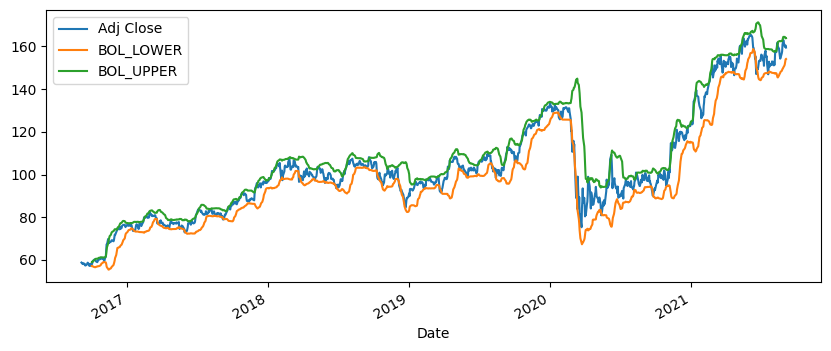

In [26]:
JPM['MA'] = JPM['Adj Close'].rolling(20).mean()
JPM['STD'] = JPM['Adj Close'].rolling(20).std()

JPM['BOL_LOWER'] = JPM['MA'] - 2*JPM['STD']
JPM['BOL_UPPER'] = JPM['MA'] + 2*JPM['STD']

fig,ax =plt.subplots(figsize=(10,4))
JPM[['Adj Close','BOL_LOWER','BOL_UPPER']].plot(ax=ax)

<Axes: xlabel='Date'>

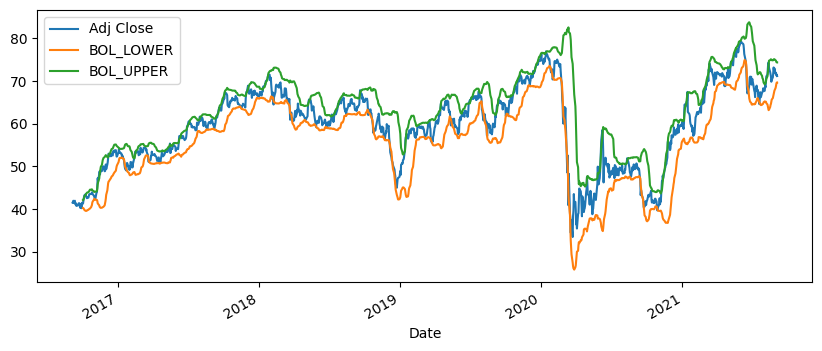

In [27]:
C['MA'] = C['Adj Close'].rolling(20).mean()
C['STD'] = C['Adj Close'].rolling(20).std()

C['BOL_LOWER'] = C['MA'] - 2*C['STD']
C['BOL_UPPER'] = C['MA'] + 2*C['STD']

fig,ax =plt.subplots(figsize=(10,4))
C[['Adj Close','BOL_LOWER','BOL_UPPER']].plot(ax=ax)

<Axes: xlabel='Date'>

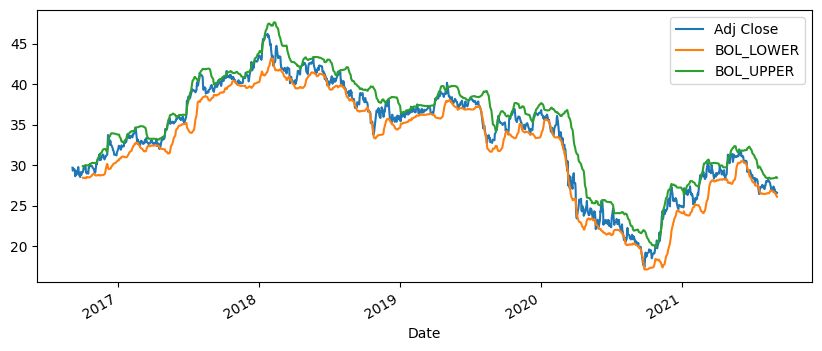

In [28]:
HSBC['MA'] = HSBC['Adj Close'].rolling(20).mean()
HSBC['STD'] = HSBC['Adj Close'].rolling(20).std()

HSBC['BOL_LOWER'] = HSBC['MA'] - 2*HSBC['STD']
HSBC['BOL_UPPER'] = HSBC['MA'] + 2*HSBC['STD']

fig,ax =plt.subplots(figsize=(10,4))
HSBC[['Adj Close','BOL_LOWER','BOL_UPPER']].plot(ax=ax)

<Axes: xlabel='Date'>

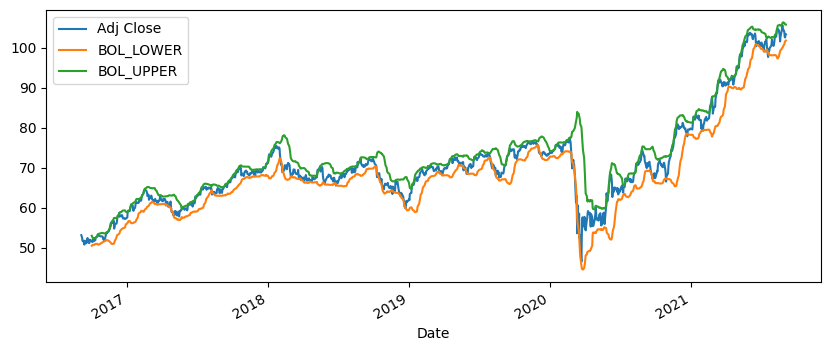

In [29]:
RY['MA'] = RY['Adj Close'].rolling(20).mean()
RY['STD'] = RY['Adj Close'].rolling(20).std()

RY['BOL_LOWER'] = RY['MA'] - 2*RY['STD']
RY['BOL_UPPER'] = RY['MA'] + 2*RY['STD']

fig,ax =plt.subplots(figsize=(10,4))
RY[['Adj Close','BOL_LOWER','BOL_UPPER']].plot(ax=ax)